# Prediccion de Diabetes

### Diccionario de Datos:

- *Pregnancies*: Número de embarazos.
- *Glucose*: Concentración de glucosa en plasma a las 2 horas en una prueba oral de tolerancia a la glucosa.
- *BloodPressure*: Presión arterial diastólica (mm Hg).
- *SkinThickness*: Espesor del pliegue cutáneo del tríceps (mm).
- *Insulin*: Niveles séricos de insulina a las 2 horas (mu U/ml).
- *BMI*: Índice de masa corporal (peso en kg / (altura en m)^2).
- *DiabetesPedigreeFunction*: Función de pedigrí de diabetes.
- *Age*: Edad (años).
- *Outcome*: Variable objetivo (1: diabetes, 0: no diabetes).


# Requisitos

## 1.Limpieza de Datos:
- Identificación y eliminación de valores duplicados: Asegúrate de que no haya registros duplicados que puedan sesgar los resultados del análisis.
- Verificación y ajuste de tipos de datos: Verifica que cada columna tenga el tipo de dato correcto (numérico o categórico) y ajusta si es necesario.
- Corrección de inconsistencias en valores categóricos: Revisa las categorías de las variables y unifica aquellos valores que puedan estar escritos de diferentes maneras pero que representen lo mismo.
- Manejo de valores faltantes adecuadamente: Identifica y maneja los valores faltantes utilizando técnicas apropiadas como la imputación de la mediana, media o moda, según corresponda.
## 2.Exploración de Datos:
- Visualizaciones univariadas y multivariadas: Crea histogramas, gráficos de barras, diagramas de dispersión y mapas de calor para entender la distribución y las relaciones entre las variables.
- Estadísticas descriptivas: Calcula medidas de tendencia central (media, mediana, moda) y de dispersión (rango, desviación estándar) para cada característica del dataset.
## 3.Implementación de Modelos:
- Modelos de Clasificación: Implementa modelos de Random Forest y XGBoost.
- Evaluación de Modelos: Evalúa los modelos utilizando métricas como accuracy, precision, recall, F1-score, y ROC-AUC.
- Comparación de Rendimiento: Compara los resultados de ambos modelos y discute cuál es el más adecuado para este dataset.

# Desarrollo

# 1.Limpieza de Datos:

In [165]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [166]:
df = pd.read_csv('C:/Users/hp/Downloads/archive (7)/diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Pregnancies                768 non-null    int64  
 1   Glucose                    768 non-null    int64  
 2   BloodPressure              768 non-null    int64  
 3   SkinThickness              768 non-null    int64  
 4   Insulin                    768 non-null    int64  
 5   BMI                        768 non-null    float64
 6   DiabetesPedigreeFunction   768 non-null    float64
 7   Age                        768 non-null    int64  
 8   Outcome                    768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [168]:
# Identificacion de valores faltantes:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
Pregnancies,768,0,0.0
Glucose,768,0,0.0
BloodPressure,768,0,0.0
SkinThickness,768,0,0.0
Insulin,768,0,0.0
BMI,768,0,0.0
DiabetesPedigreeFunction,768,0,0.0
Age,768,0,0.0
Outcome,768,0,0.0


In [169]:
print(df.columns)

Index(['Pregnancies ', 'Glucose ', 'BloodPressure ', 'SkinThickness ',
       'Insulin ', 'BMI  ', 'DiabetesPedigreeFunction ', 'Age ', 'Outcome'],
      dtype='object')


In [170]:
# Eliminar espacios en los nombres de las columnas:
df.columns = df.columns.str.strip()

# Verificar los nombres de las columnas después del cambio:
print(df.columns)

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')


In [171]:
# Reemplazar los valores en 0 con la mediana de la columna correspondiente:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin','BMI']
for column in columns_to_replace:
    median_value = df[column][df[column] != 0].median()
    df[column] = df[column].replace(0, median_value)

# Verificar los cambios luego de la correccion:
print(df.head(10))

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35      125  33.6   
1            1       85             66             29      125  26.6   
2            8      183             64             29      125  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   
5            5      116             74             29      125  25.6   
6            3       78             50             32       88  31.0   
7           10      115             72             29      125  35.3   
8            2      197             70             45      543  30.5   
9            8      125             96             29      125  32.3   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   2

In [172]:
# Visualizacion de datos luego del relleno de los valores en 0 con la mediana de cada columna:
df.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,125,33.6,0.627,50,1
1,1,85,66,29,125,26.6,0.351,31,0
2,8,183,64,29,125,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,29,125,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,72,29,125,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,29,125,32.3,0.232,54,1


# 2.Exploracion de datos

## Visualizacion de datos Univariados

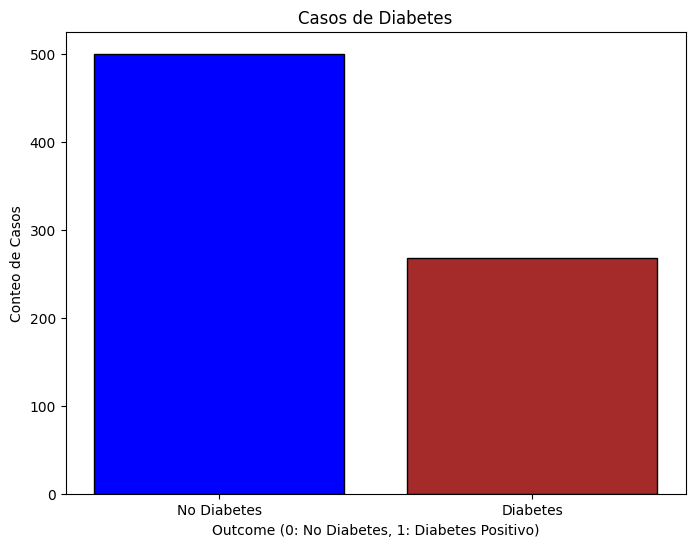

In [173]:
# Conteo de casos de diabetes:
conteo_casos = df['Outcome'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(conteo_casos.index, conteo_casos.values, color=['blue', 'brown'], edgecolor='black')
plt.title('Casos de Diabetes')
plt.xlabel('Outcome (0: No Diabetes, 1: Diabetes Positivo)')
plt.ylabel('Conteo de Casos')
plt.xticks([0, 1], ['No Diabetes', 'Diabetes'])
plt.show()

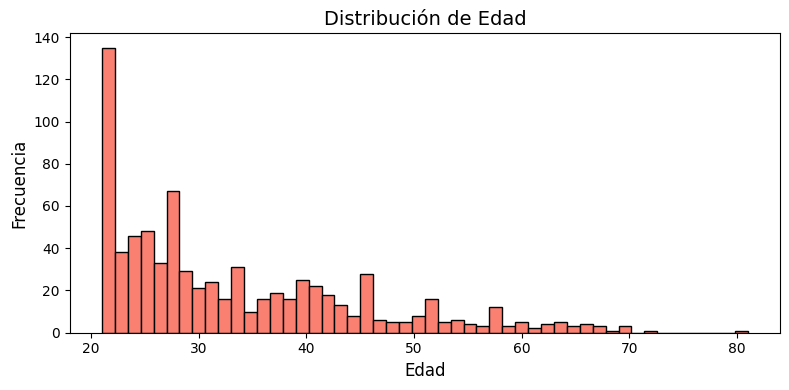

In [174]:
# Grafico de distribucion de edades de los pacientes:
fig, ax = plt.subplots(figsize=(8, 4))
df['Age'].plot(kind='hist', bins=50, color='salmon', edgecolor='black', ax=ax)
ax.set_title("Distribución de Edad", fontsize=14)
ax.set_xlabel("Edad", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

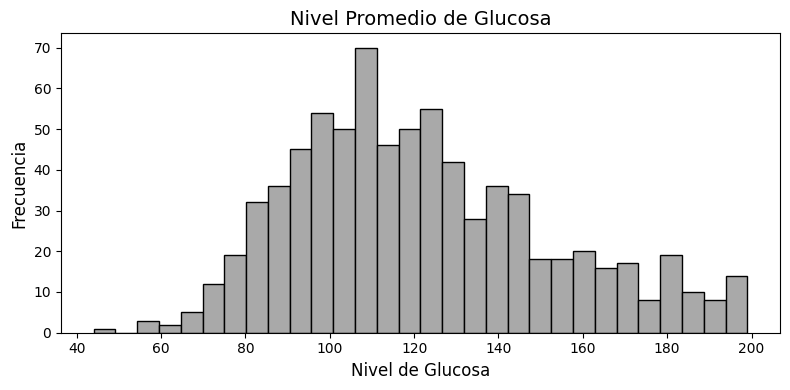

In [175]:
fig, ax = plt.subplots(figsize=(8, 4))
df['Glucose'].plot(kind='hist', bins=30, color='darkgray', edgecolor='black', ax=ax)
ax.set_title("Nivel Promedio de Glucosa", fontsize=14)
ax.set_xlabel("Nivel de Glucosa", fontsize=12)
ax.set_ylabel("Frecuencia", fontsize=12)
plt.tight_layout()
plt.show()

## Visualizacion de datos Multivariados

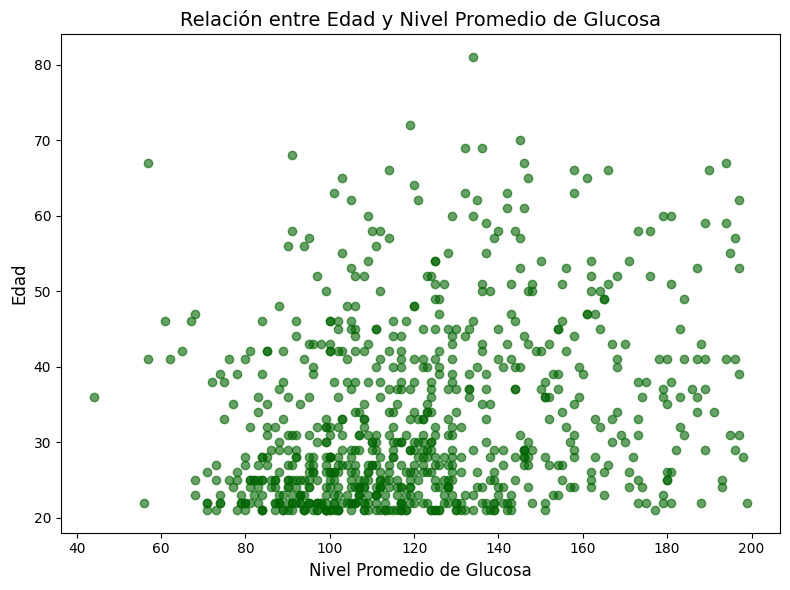

In [176]:
# Promedio de nivel de glucosa por edad:
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(df['Glucose'], df['Age'], color='darkgreen', alpha=0.6)
ax.set_title('Relación entre Edad y Nivel Promedio de Glucosa', fontsize=14)
ax.set_xlabel('Nivel Promedio de Glucosa', fontsize=12)
ax.set_ylabel('Edad', fontsize=12)
plt.tight_layout()
plt.show()

C:\Users\hp\AppData\Local\Temp\ipykernel_12736\2653262849.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', ax=ax, palette='Blues')


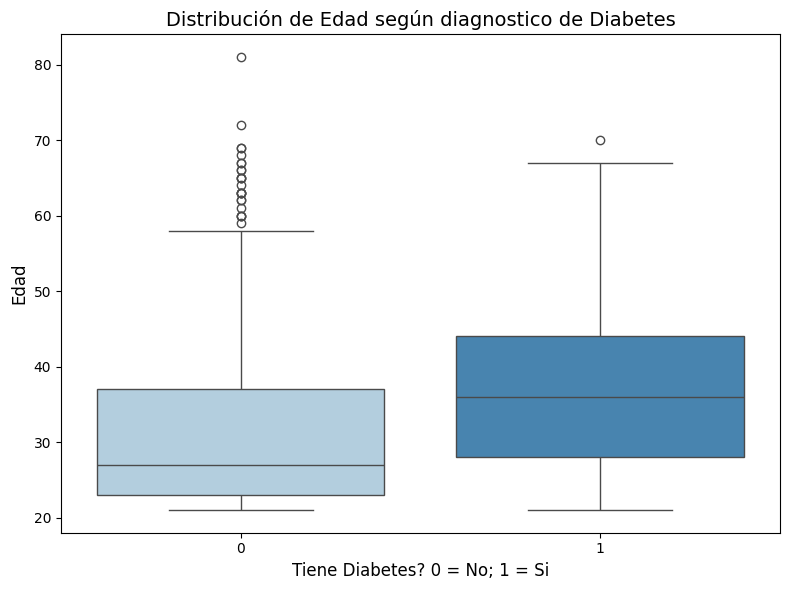

In [177]:
# Distribución de Edad según diagnostico de Diabetes:
fig, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='Age', ax=ax, palette='Blues')
ax.set_title("Distribución de Edad según diagnostico de Diabetes", fontsize=14)
ax.set_xlabel("Tiene Diabetes? 0 = No; 1 = Si", fontsize=12)
ax.set_ylabel("Edad", fontsize=12)

plt.tight_layout()
plt.show();

# 3.Implementación de Modelos:

## Preparacion de datos:

In [178]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier

In [179]:
# División de variables independientes y dependientes:
X = df.drop(columns='Outcome')  # Variables predictoras
y = df['Outcome']               # Variable objetivo

# División en conjunto de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Escalado de datos:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Implementacion de modelos:

In [180]:
# Random Forest:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_proba_rf = rf_model.predict_proba(X_test)[:, 1]

In [181]:
# Adaboost:
ab_model = AdaBoostClassifier(algorithm='SAMME', random_state=42)
ab_model.fit(X_train, y_train)
y_pred_ab = ab_model.predict(X_test)
y_proba_ab = ab_model.predict_proba(X_test)[:, 1]

In [182]:
# XGBoost:
xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

## Evaluacion de los modelos implementados:

In [183]:
def evaluate_model(y_test, y_pred, y_proba, Diabetes_Detection):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    
    print(f"{Diabetes_Detection} Performance:")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-Score: {f1:.2f}")
    print(f"ROC-AUC: {roc_auc:.2f}")
    print("-" * 30)
    
    return accuracy, precision, recall, f1, roc_auc

In [184]:
results = []

results.append(evaluate_model(y_test, y_pred_rf, y_proba_rf, "Random Forest"))
results.append(evaluate_model(y_test, y_pred_ab, y_proba_ab, "AdaBoost"))
results.append(evaluate_model(y_test, y_pred_xgb, y_proba_xgb, "XGBoost"))

Random Forest Performance:
Accuracy: 0.74
Precision: 0.66
Recall: 0.52
F1-Score: 0.58
ROC-AUC: 0.82
------------------------------
AdaBoost Performance:
Accuracy: 0.76
Precision: 0.69
Recall: 0.56
F1-Score: 0.62
ROC-AUC: 0.82
------------------------------
XGBoost Performance:
Accuracy: 0.75
Precision: 0.67
Recall: 0.59
F1-Score: 0.63
ROC-AUC: 0.80
------------------------------


## Visualizacion de curva ROC:

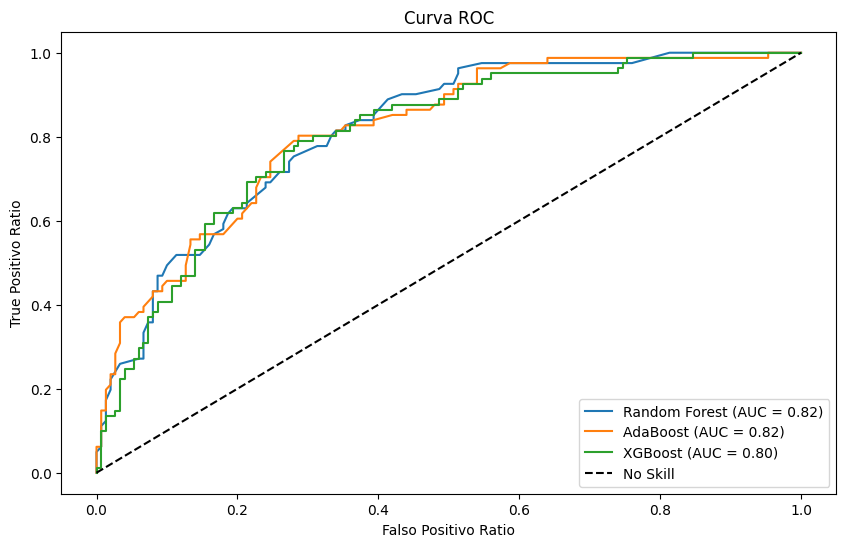

In [185]:
plt.figure(figsize=(10, 6))

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_ab, tpr_ab, _ = roc_curve(y_test, y_proba_ab)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

plt.plot(fpr_rf, tpr_rf, label='Random Forest (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_rf)))
plt.plot(fpr_ab, tpr_ab, label='AdaBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_ab)))
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = {:.2f})'.format(roc_auc_score(y_test, y_proba_xgb)))

plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlabel('Falso Positivo Ratio')
plt.ylabel('True Positivo Ratio')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

## Conclusion:

### Segun los resultados el XGBoost es el modelo más adecuado para este caso porque tiene el mayor recall, lo que es crucial para detectar el mayor número de casos positivos de diabetes. Ofrece el mejor F1-Score, logrando un buen balance entre precisión y recall. Aunque el ROC-AUC es ligeramente menor en comparacion a los otros modelos, sigue siendo competitivo para un correcto desempeño predictivo en casos sensibles tal como la prediccion de enfermedades.

# Fuentes de consulta:

- Anotaciones de clases Coding Dojo.
- Chat GPT.